## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [43]:
# importing data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

In [2]:
# Loading csv data
kc_house_data = pd.read_csv("C:/Users/pcx/Downloads/dsc-phase-2-project/data/kc_house_data.csv")

In [3]:
# inspecting data
kc_house_data.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
kc_house_data.shape

(21597, 21)

In [5]:
kc_house_data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [6]:
# checking summary of kc housing data
# checking for null values
# checking for duplicates
kc_house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [7]:
kc_house_data.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [8]:
# null values present in housing data, 63 missing values in view, 2376 missing values in waterfront and 3842 missing values in yr_renovated.
# Defining a function to return percentage of missing values
def missing_values(kc_house_data):
    #Identify the total missing values per column and sort
    miss = kc_house_data.isna().sum().sort_values(ascending = False)
    
    #Calculating percentage of missing values and sorting
    percent_miss = (kc_house_data.isna().sum()/len(kc_house_data)).sort_values(ascending = False)
    
    #Store in dataframe
    missing = pd.DataFrame({'Missing values':miss, 'Percentage %':percent_miss*100})
    
    return missing

missing_vals = missing_values(kc_house_data)
missing_vals

,Missing values,Percentage %
yr_renovated,3842,17.789508
waterfront,2376,11.001528
view,63,0.291707
id,0,0.000000
sqft_above,0,0.000000
sqft_living15,0,0.000000
long,0,0.000000
lat,0,0.000000
zipcode,0,0.000000
yr_built,0,0.000000


In [9]:
# checking for duplicates
kc_house_data.duplicated().sum()

0

In [10]:
# filling null values
median_yr_renovated = kc_house_data['yr_renovated'].median()
kc_house_data['yr_renovated'].fillna(median_yr_renovated, inplace=True)


In [11]:
mode_waterfront = kc_house_data['waterfront'].mode()[0]
kc_house_data['waterfront'].fillna(mode_waterfront, inplace=True)


In [12]:
mode_waterfront = kc_house_data['view'].mode()[0]
kc_house_data['view'].fillna(mode_waterfront, inplace=True)


In [13]:
# rechecking null values
kc_house_data.isna().sum()



id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [14]:
# checking for duplicates
kc_house_data.duplicated().sum()

0

In [15]:
kc_house_data.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [16]:
kc_house_data.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [17]:
## adding new columns relese_year and release_month

kc_house_data["date"] = pd.to_datetime(kc_house_data["date"])

kc_house_data["year"] = kc_house_data["date"].dt.year
kc_house_data["month"] = kc_house_data["date"].dt.month

In [18]:
kc_house_data.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,2014,10
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,2014,12
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,2015,2
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,2014,12
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,2015,2


In [19]:
kc_house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     21597 non-null  float64       
 9   view           21597 non-null  float64       
 10  condition      21597 non-null  int64         
 11  grade          21597 non-null  int64         
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21597 non-null  object        
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   2159

In [20]:
kc_house_data.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
year             0
month            0
dtype: int64

In [21]:
#modifying sfft_basement to numeric
kc_house_data['sqft_basement'].dtype


dtype('O')

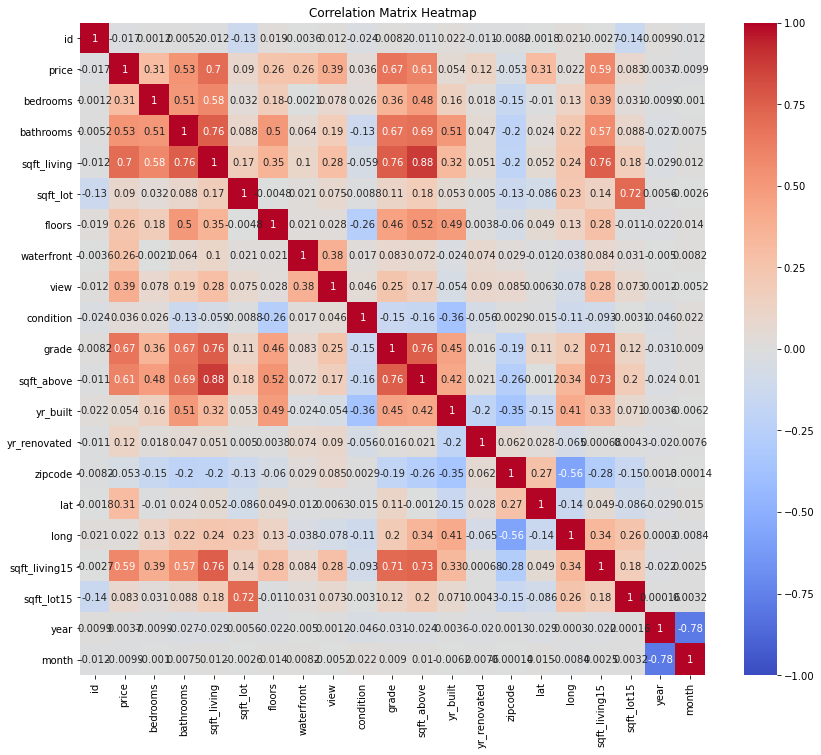

Highly correlated pairs (absolute value > 0.7):
('price', 'sqft_living')
('bathrooms', 'sqft_living')
('sqft_living', 'grade')
('sqft_living', 'sqft_above')
('sqft_living', 'sqft_living15')
('sqft_lot', 'sqft_lot15')
('grade', 'sqft_above')
('grade', 'sqft_living15')
('sqft_above', 'sqft_living15')
('year', 'month')


In [25]:
# checking for highest corelation

numeric_columns = kc_house_data.select_dtypes(include=['int64', 'float64']).columns

correlation_matrix = kc_house_data[numeric_columns].corr()

plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

# Identify pairs with high correlation (absolute value greater than 0.7, for example)
threshold = 0.7
high_correlation_pairs = np.where(np.abs(correlation_matrix) > threshold)

# Convert to list of pairs
high_correlation_pairs = [(numeric_columns[i], numeric_columns[j]) 
                          for i, j in zip(*high_correlation_pairs) if i != j and i < j]

# Display high correlation pairs
print("Highly correlated pairs (absolute value > 0.7):")
for pair in high_correlation_pairs:
    print(pair)


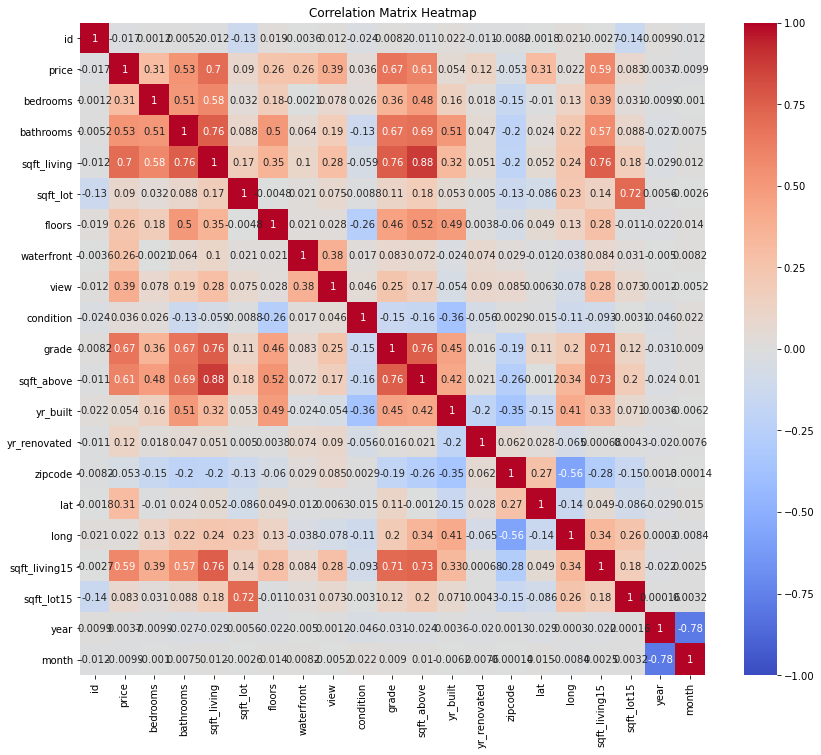

Features with a correlation to price greater than 0.5:
price: 1.00
sqft_living: 0.70
grade: 0.67
sqft_above: 0.61
sqft_living15: 0.59
bathrooms: 0.53


In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming kc_house_data is your DataFrame

# Select numeric columns
numeric_columns = kc_house_data.select_dtypes(include=['int64', 'float64']).columns

# Calculate the correlation matrix
correlation_matrix = kc_house_data[numeric_columns].corr()

# Plot the correlation matrix heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

# Extract the correlation with 'price'
price_correlation = correlation_matrix['price'].abs().sort_values(ascending=False)

# Filter for correlations greater than 0.5
high_correlation_features = price_correlation[price_correlation > 0.5]

# Display the features with a correlation to price greater than 0.5
print("Features with a correlation to price greater than 0.5:")
for feature, value in high_correlation_features.iteritems():
    print(f"{feature}: {value:.2f}")


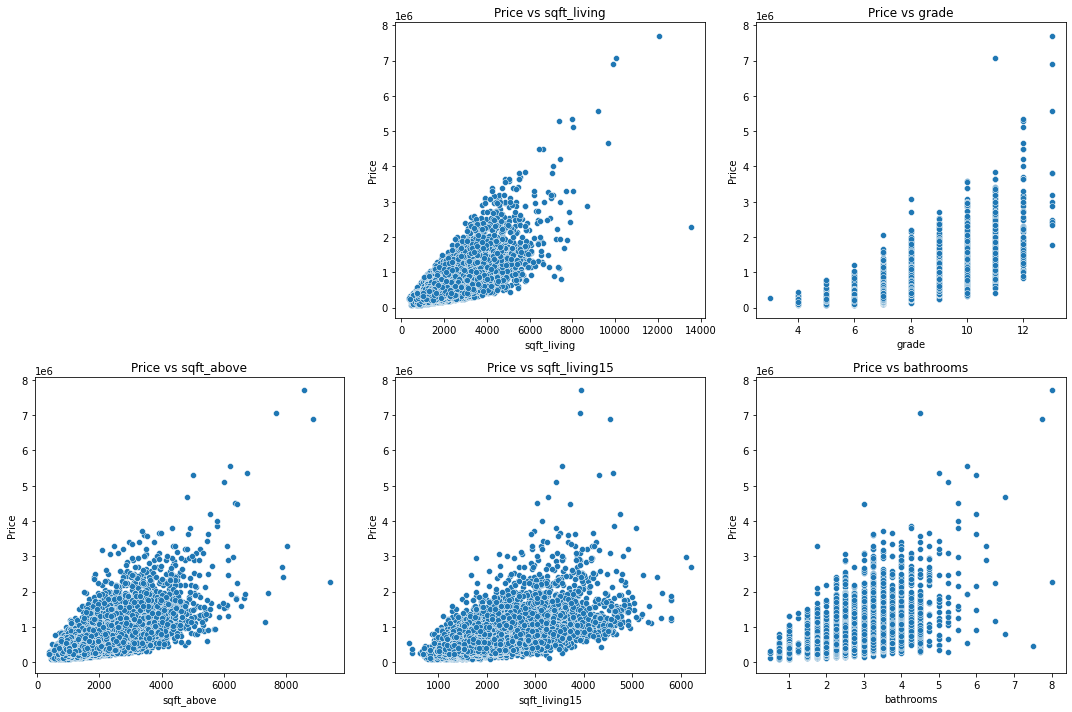

In [39]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(high_correlation_features.index):
    if feature != 'price':  # Skip price itself
        plt.subplot(2, 3, i+1)  # Adjust layout based on the number of features
        sns.scatterplot(x=kc_house_data[feature], y=kc_house_data['price'])
        plt.title(f'Price vs {feature}')
        plt.xlabel(feature)
        plt.ylabel('Price')

plt.tight_layout()
plt.show()

In [46]:
# One-hot encoding the 'grade' column
encoder = OneHotEncoder(sparse=False)
encoded = encoder.fit_transform(kc_house_data[['grade']])

# Manually create the column names
grade_categories = encoder.categories_[0]
column_names = [f'grade_{int(cat)}' for cat in grade_categories]

# Create the DataFrame with the encoded data
grades_df = pd.DataFrame(encoded, columns=column_names, dtype='int')

# Merging with the original DataFrame
kc_house_encoded = kc_house_data.join(grades_df)

c:\Users\pcx\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
c:\Users\pcx\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                     3321.
Date:                Wed, 17 Jul 2024   Prob (F-statistic):               0.00
Time:                        14:25:24   Log-Likelihood:            -2.9950e+05
No. Observations:               21597   AIC:                         5.990e+05
Df Residuals:                   21589   BIC:                         5.991e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
intercept      2.069e+04   7701.281      2.687

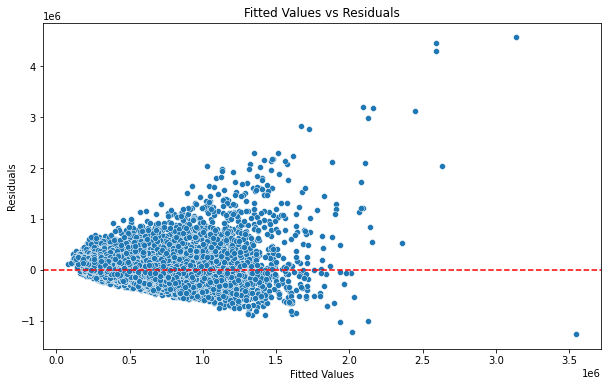

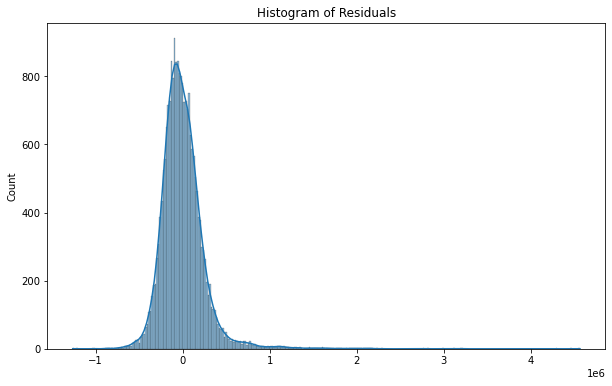

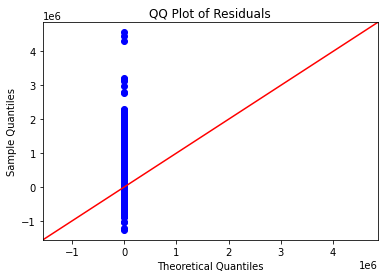

         feature        VIF
0        grade_7   2.321230
1        grade_8   2.362624
2        grade_9   1.752726
3    sqft_living  36.418961
4      bathrooms  19.730711
5     sqft_above  26.526696
6  sqft_living15  18.337569


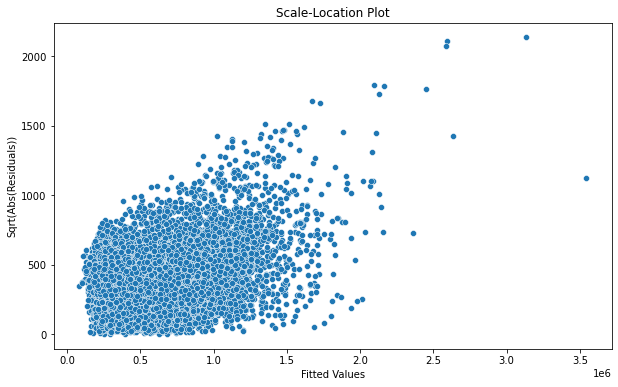

In [47]:
import statsmodels.api as sm
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Prepare the data
kc_house_encoded['intercept'] = 1  # Add an intercept term
features = ['intercept', 'grade_7', 'grade_8', 'grade_9', 'sqft_living', 'bathrooms', 'sqft_above', 'sqft_living15']
X = kc_house_encoded[features]
y = kc_house_encoded['price']

# Create the model
model = sm.OLS(y, X).fit()

# Print the summary
print(model.summary())

# Check Assumptions

# 1. Linearity
plt.figure(figsize=(10, 6))
sns.scatterplot(x=model.fittedvalues, y=model.resid)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Fitted Values vs Residuals')
plt.show()

# 2. Normality of residuals
plt.figure(figsize=(10, 6))
sns.histplot(model.resid, kde=True)
plt.title('Histogram of Residuals')
plt.show()

sm.qqplot(model.resid, line='45')
plt.title('QQ Plot of Residuals')
plt.show()

# 3. Multicollinearity
vif_data = pd.DataFrame()
vif_data['feature'] = features[1:]  # Exclude intercept for VIF calculation
vif_data['VIF'] = [variance_inflation_factor(X[features[1:]].values, i) for i in range(len(features[1:]))]
print(vif_data)

# 4. Homoscedasticity
plt.figure(figsize=(10, 6))
sns.scatterplot(x=model.fittedvalues, y=np.sqrt(np.abs(model.resid)))
plt.xlabel('Fitted Values')
plt.ylabel('Sqrt(Abs(Residuals))')
plt.title('Scale-Location Plot')
plt.show()


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                     3321.
Date:                Wed, 17 Jul 2024   Prob (F-statistic):               0.00
Time:                        15:29:38   Log-Likelihood:            -2.9950e+05
No. Observations:               21597   AIC:                         5.990e+05
Df Residuals:                   21589   BIC:                         5.991e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
intercept      6.434e+05   4168.268    154.352

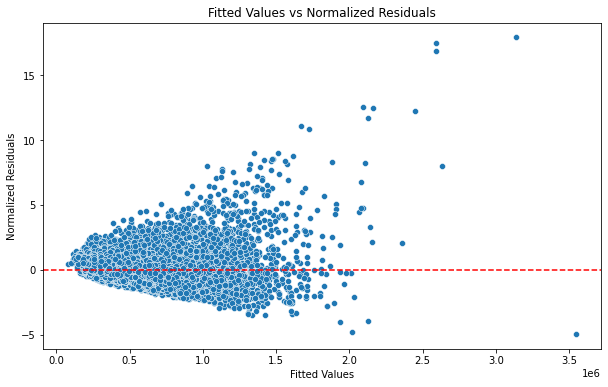

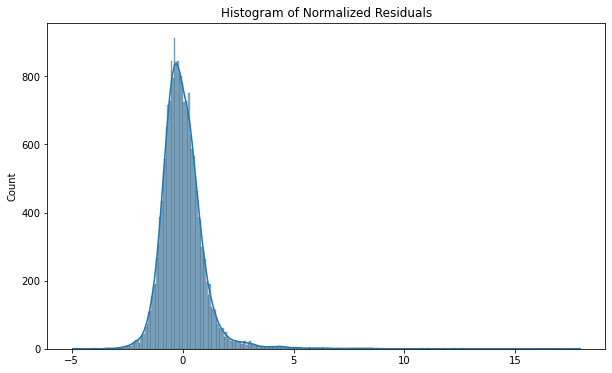

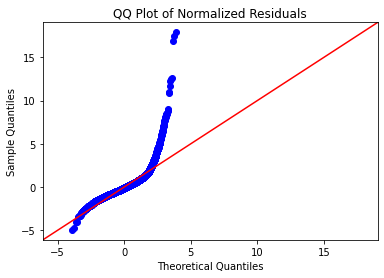

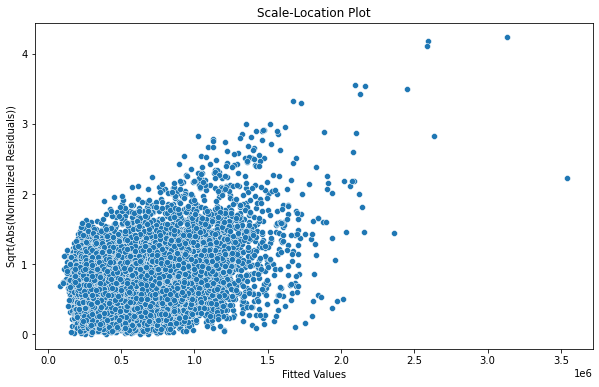

In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score

# Normalize the features
scaler = StandardScaler()
kc_house_scaled = kc_house_data.copy()

# Select numeric columns for scaling
numeric_columns = ['sqft_living', 'bathrooms', 'sqft_above', 'sqft_living15']
kc_house_scaled[numeric_columns] = scaler.fit_transform(kc_house_scaled[numeric_columns])

# One-hot encoding for 'grade'
encoder = OneHotEncoder(sparse=False)
encoded = encoder.fit_transform(kc_house_scaled[['grade']])
grade_categories = encoder.categories_[0]
column_names = [f'grade_{int(cat)}' for cat in grade_categories]
grades_df = pd.DataFrame(encoded, columns=column_names, dtype='int')
kc_house_scaled = kc_house_scaled.join(grades_df)

# Prepare the data for the model
kc_house_scaled['intercept'] = 1
features = ['intercept', 'grade_7', 'grade_8', 'grade_9', 'sqft_living', 'bathrooms', 'sqft_above', 'sqft_living15']
X = kc_house_scaled[features]
y = kc_house_scaled['price']

# Fit the linear regression model
model = sm.OLS(y, X).fit()
print(model.summary())

# Calculate and normalize residuals
residuals = model.resid
normalized_residuals = (residuals - np.mean(residuals)) / np.std(residuals)

# Evaluate the model
y_pred = model.predict(X)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Check Assumptions

# Linearity
plt.figure(figsize=(10, 6))
sns.scatterplot(x=model.fittedvalues, y=normalized_residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Normalized Residuals')
plt.title('Fitted Values vs Normalized Residuals')
plt.show()

# Normality of residuals
plt.figure(figsize=(10, 6))
sns.histplot(normalized_residuals, kde=True)
plt.title('Histogram of Normalized Residuals')
plt.show()

sm.qqplot(normalized_residuals, line='45')
plt.title('QQ Plot of Normalized Residuals')
plt.show()

# Homoscedasticity
plt.figure(figsize=(10, 6))
sns.scatterplot(x=model.fittedvalues, y=np.sqrt(np.abs(normalized_residuals)))
plt.xlabel('Fitted Values')
plt.ylabel('Sqrt(Abs(Normalized Residuals))')
plt.title('Scale-Location Plot')
plt.show()


In [49]:
from sklearn.preprocessing import PolynomialFeatures

# Define features and target variable
features = ['grade_7', 'grade_8', 'grade_9', 'sqft_living', 'bathrooms', 'sqft_above', 'sqft_living15']
X = kc_house_scaled[features]
y = kc_house_scaled['price']

# Create polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# Print the new feature names
poly_feature_names = poly.get_feature_names(features)
print(f'Polynomial Feature Names:\n{poly_feature_names}')

# Fit the model with polynomial features
model_poly = sm.OLS(y, sm.add_constant(X_poly)).fit()
print(model_poly.summary())


Polynomial Feature Names:
['grade_7', 'grade_8', 'grade_9', 'sqft_living', 'bathrooms', 'sqft_above', 'sqft_living15', 'grade_7^2', 'grade_7 grade_8', 'grade_7 grade_9', 'grade_7 sqft_living', 'grade_7 bathrooms', 'grade_7 sqft_above', 'grade_7 sqft_living15', 'grade_8^2', 'grade_8 grade_9', 'grade_8 sqft_living', 'grade_8 bathrooms', 'grade_8 sqft_above', 'grade_8 sqft_living15', 'grade_9^2', 'grade_9 sqft_living', 'grade_9 bathrooms', 'grade_9 sqft_above', 'grade_9 sqft_living15', 'sqft_living^2', 'sqft_living bathrooms', 'sqft_living sqft_above', 'sqft_living sqft_living15', 'bathrooms^2', 'bathrooms sqft_above', 'bathrooms sqft_living15', 'sqft_above^2', 'sqft_above sqft_living15', 'sqft_living15^2']
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statist

In [50]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Fit Ridge Regression model
ridge = Ridge(alpha=1.0)  # You can adjust alpha for regularization strength
ridge.fit(X_train, y_train)

# Make predictions
y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)

# Evaluate model
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f'Training MSE: {train_mse}')
print(f'Test MSE: {test_mse}')
print(f'Training R2 Score: {train_r2}')
print(f'Test R2 Score: {test_r2}')


Training MSE: 53530742369.339195
Test MSE: 51758445888.08053
Training R2 Score: 0.6067676044382381
Test R2 Score: 0.60251939432608


In [51]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(ridge, X_poly, y, cv=5, scoring='r2')
print(f'Cross-validated R2 scores: {cv_scores}')
print(f'Mean Cross-validated R2 score: {np.mean(cv_scores)}')


Cross-validated R2 scores: [0.6020001  0.60925881 0.5409148  0.59350717 0.58747768]
Mean Cross-validated R2 score: 0.5866317141963697


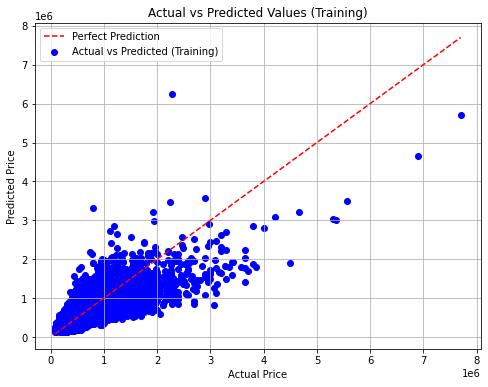

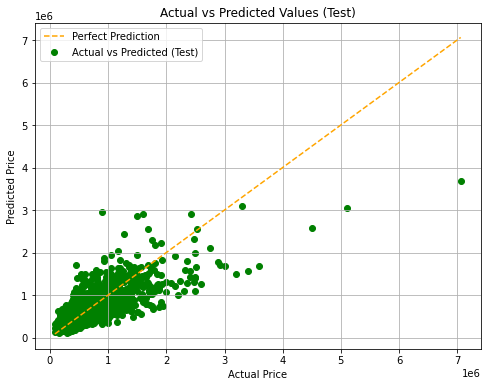

In [52]:
import matplotlib.pyplot as plt

# Scatterplot of actual vs predicted values for training set
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_train_pred, color='blue', label='Actual vs Predicted (Training)')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('Actual vs Predicted Values (Training)')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.legend()
plt.grid(True)
plt.show()

# Scatterplot of actual vs predicted values for test set
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, color='green', label='Actual vs Predicted (Test)')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='orange', label='Perfect Prediction')
plt.title('Actual vs Predicted Values (Test)')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.legend()
plt.grid(True)
plt.show()


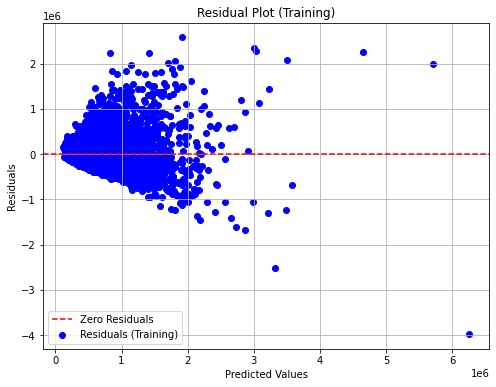

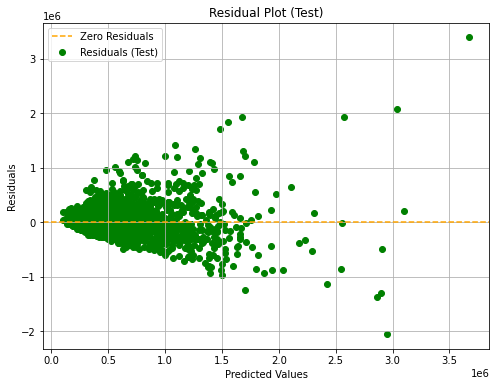

In [53]:
# Calculate residuals
train_residuals = y_train - y_train_pred
test_residuals = y_test - y_test_pred

# Residual plot for training set
plt.figure(figsize=(8, 6))
plt.scatter(y_train_pred, train_residuals, color='blue', label='Residuals (Training)')
plt.axhline(y=0, color='red', linestyle='--', label='Zero Residuals')
plt.title('Residual Plot (Training)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend()
plt.grid(True)
plt.show()

# Residual plot for test set
plt.figure(figsize=(8, 6))
plt.scatter(y_test_pred, test_residuals, color='green', label='Residuals (Test)')
plt.axhline(y=0, color='orange', linestyle='--', label='Zero Residuals')
plt.title('Residual Plot (Test)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend()
plt.grid(True)
plt.show()


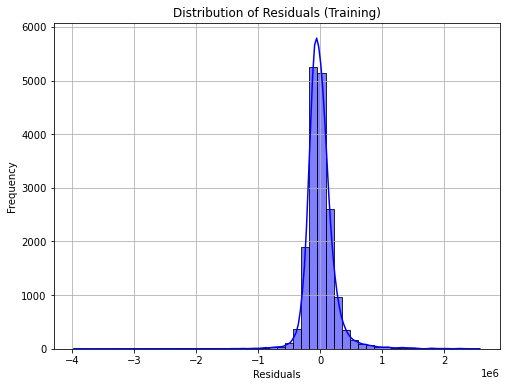

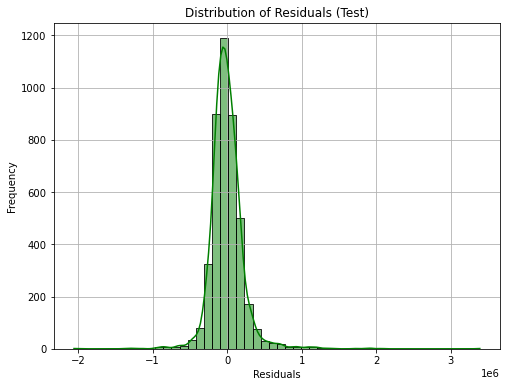

In [54]:
# Distribution of residuals for training set
plt.figure(figsize=(8, 6))
sns.histplot(train_residuals, kde=True, color='blue', bins=50)
plt.title('Distribution of Residuals (Training)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Distribution of residuals for test set
plt.figure(figsize=(8, 6))
sns.histplot(test_residuals, kde=True, color='green', bins=50)
plt.title('Distribution of Residuals (Test)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
